# All you need is pandas

Jiawei Qiu, 2023.11.22

[Pandas](https://pandas.pydata.org/) provides convient methods handling experiment datas, no matter it is 1d, 2d or 3d. 
This note will show you how to collect, transform, filter and manipulate datas with pandas, in 5 minutes.
For more detail, please refer to https://pandas.pydata.org/docs/

First lets create a 2d data.

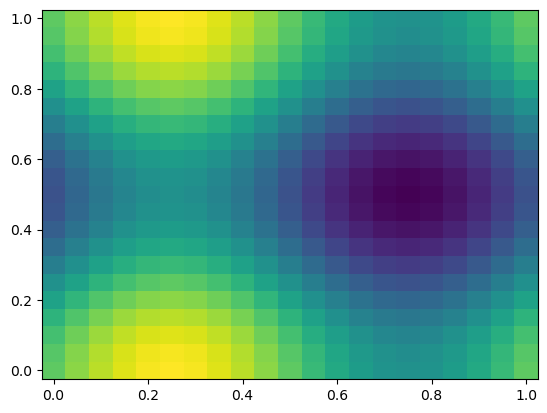

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 21)
y = np.linspace(0, 1, 21)
x, y = np.meshgrid(x, y)
z = np.sin(x * 2 * np.pi) + np.cos(y * 2 * np.pi)
plt.pcolormesh(x.reshape(21, 21), y.reshape(21, 21), z.reshape(21, 21))

These three arrays can be stored together into *one* dataframe.

In [2]:
df = pd.DataFrame({"x": x.ravel(), "y": y.ravel(), "z": z.ravel()})
df

,x,y,z
0,0.00,0.0,1.000000
1,0.05,0.0,1.309017
2,0.10,0.0,1.587785
3,0.15,0.0,1.809017
4,0.20,0.0,1.951057
...,...,...,...
436,0.80,1.0,0.048943
437,0.85,1.0,0.190983
438,0.90,1.0,0.412215
439,0.95,1.0,0.690983


It is easy to get back the numpy array.

In [3]:
df['z'].values  # df['z'].to_list() gives you a list.

array([ 1.00000000e+00,  1.30901699e+00,  1.58778525e+00,  1.80901699e+00,
        1.95105652e+00,  2.00000000e+00,  1.95105652e+00,  1.80901699e+00,
        1.58778525e+00,  1.30901699e+00,  1.00000000e+00,  6.90983006e-01,
        4.12214748e-01,  1.90983006e-01,  4.89434837e-02,  0.00000000e+00,
        4.89434837e-02,  1.90983006e-01,  4.12214748e-01,  6.90983006e-01,
        1.00000000e+00,  9.51056516e-01,  1.26007351e+00,  1.53884177e+00,
        1.76007351e+00,  1.90211303e+00,  1.95105652e+00,  1.90211303e+00,
        1.76007351e+00,  1.53884177e+00,  1.26007351e+00,  9.51056516e-01,
        6.42039522e-01,  3.63271264e-01,  1.42039522e-01,  0.00000000e+00,
       -4.89434837e-02, -1.11022302e-16,  1.42039522e-01,  3.63271264e-01,
        6.42039522e-01,  9.51056516e-01,  8.09016994e-01,  1.11803399e+00,
        1.39680225e+00,  1.61803399e+00,  1.76007351e+00,  1.80901699e+00,
        1.76007351e+00,  1.61803399e+00,  1.39680225e+00,  1.11803399e+00,
        8.09016994e-01,  

The data stored in 1d list now, but it is easy to reshape it to 2d.

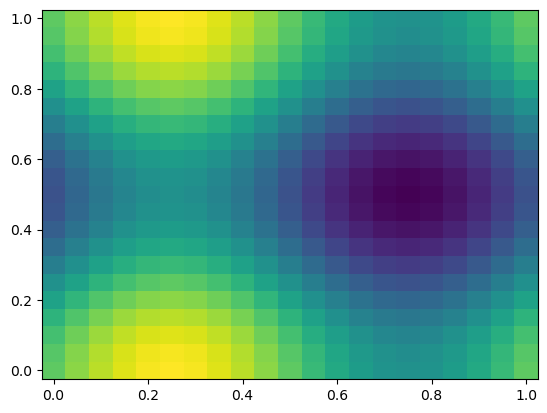

In [4]:
# df.sort_values(by=['x', 'y'], inplace=True)  # In case data is not sorted.
plt.pcolormesh(
    df['x'].unique(),
    df['y'].unique(),
    df['z'].values.reshape(21, 21),
)

Pivot provides an alternative.

In [5]:
z_2d = df.pivot(index='x', columns='y', values='z')
z_2d

y,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,...,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
x,,,,,,,,,,,,,,,,,,,,,
0.00,1.000000,9.510565e-01,8.090170e-01,5.877853e-01,3.090170e-01,6.123234e-17,-3.090170e-01,-5.877853e-01,-8.090170e-01,-0.951057,...,-0.951057,-8.090170e-01,-5.877853e-01,-3.090170e-01,-1.836970e-16,3.090170e-01,5.877853e-01,8.090170e-01,9.510565e-01,1.000000
0.05,1.309017,1.260074e+00,1.118034e+00,8.968022e-01,6.180340e-01,3.090170e-01,-1.665335e-16,-2.787683e-01,-5.000000e-01,-0.642040,...,-0.642040,-5.000000e-01,-2.787683e-01,-1.665335e-16,3.090170e-01,6.180340e-01,8.968022e-01,1.118034e+00,1.260074e+00,1.309017
0.10,1.587785,1.538842e+00,1.396802e+00,1.175571e+00,8.968022e-01,5.877853e-01,2.787683e-01,1.110223e-16,-2.212317e-01,-0.363271,...,-0.363271,-2.212317e-01,-1.110223e-16,2.787683e-01,5.877853e-01,8.968022e-01,1.175571e+00,1.396802e+00,1.538842e+00,1.587785
0.15,1.809017,1.760074e+00,1.618034e+00,1.396802e+00,1.118034e+00,8.090170e-01,5.000000e-01,2.212317e-01,1.110223e-16,-0.142040,...,-0.142040,2.220446e-16,2.212317e-01,5.000000e-01,8.090170e-01,1.118034e+00,1.396802e+00,1.618034e+00,1.760074e+00,1.809017
0.20,1.951057,1.902113e+00,1.760074e+00,1.538842e+00,1.260074e+00,9.510565e-01,6.420395e-01,3.632713e-01,1.420395e-01,0.000000,...,0.000000,1.420395e-01,3.632713e-01,6.420395e-01,9.510565e-01,1.260074e+00,1.538842e+00,1.760074e+00,1.902113e+00,1.951057
0.25,2.000000,1.951057e+00,1.809017e+00,1.587785e+00,1.309017e+00,1.000000e+00,6.909830e-01,4.122147e-01,1.909830e-01,0.048943,...,0.048943,1.909830e-01,4.122147e-01,6.909830e-01,1.000000e+00,1.309017e+00,1.587785e+00,1.809017e+00,1.951057e+00,2.000000
0.30,1.951057,1.902113e+00,1.760074e+00,1.538842e+00,1.260074e+00,9.510565e-01,6.420395e-01,3.632713e-01,1.420395e-01,0.000000,...,0.000000,1.420395e-01,3.632713e-01,6.420395e-01,9.510565e-01,1.260074e+00,1.538842e+00,1.760074e+00,1.902113e+00,1.951057
0.35,1.809017,1.760074e+00,1.618034e+00,1.396802e+00,1.118034e+00,8.090170e-01,5.000000e-01,2.212317e-01,1.110223e-16,-0.142040,...,-0.142040,2.220446e-16,2.212317e-01,5.000000e-01,8.090170e-01,1.118034e+00,1.396802e+00,1.618034e+00,1.760074e+00,1.809017
0.40,1.587785,1.538842e+00,1.396802e+00,1.175571e+00,8.968022e-01,5.877853e-01,2.787683e-01,2.220446e-16,-2.212317e-01,-0.363271,...,-0.363271,-2.212317e-01,0.000000e+00,2.787683e-01,5.877853e-01,8.968022e-01,1.175571e+00,1.396802e+00,1.538842e+00,1.587785


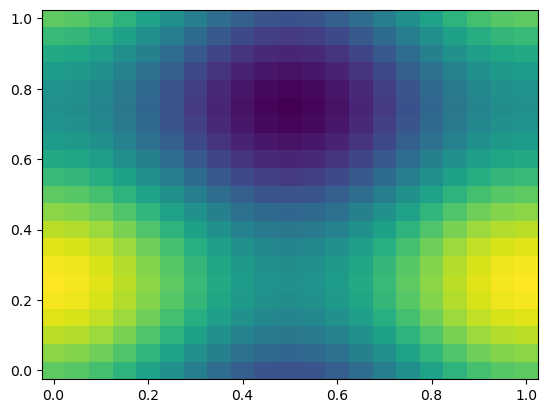

In [6]:
plt.pcolormesh(z_2d.index, z_2d.columns, z_2d.values)

Plotting is easy even if the 2d data does not span a rectangular region.

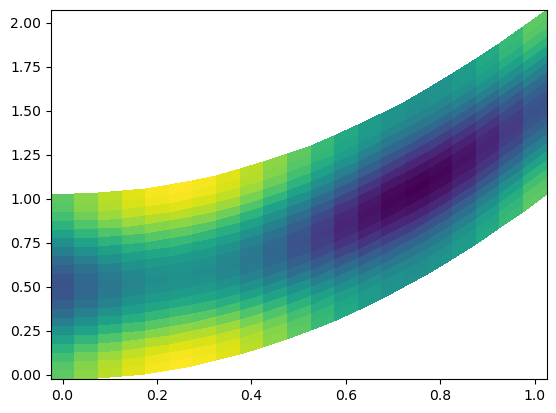

In [7]:
df['y2'] = df['y'] + df['x'] ** 2
plt.pcolormesh(
    df['x'].values.reshape(21, 21),
    df['y2'].values.reshape(21, 21),
    df['z'].values.reshape(21, 21),
)

Collecting data could be more intuitive and easy-to-read with pandas than appending list.

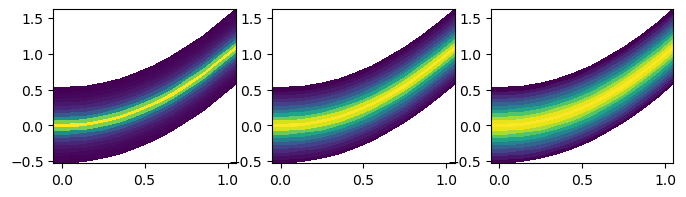

In [8]:
from itertools import product

records = []
for a, b, c in product(
    np.linspace(0, 1, 11),
    np.linspace(0, 1, 21),
    [1,2,3],
):
    b2 = a ** 2 + b - 0.5
    v = 1 / (1 + ((b2 - a**2) / (0.1*c)) ** 2)
    records.append(dict(a=a, b=b, c=c, b2=b2, v=v))
df = pd.DataFrame.from_records(records)

fig, axs = plt.subplots(figsize=(8, 2), ncols=3)
for c in df['c'].unique():
    part = df.query(f'c == {c}')
    axs[c-1].pcolormesh(
        part['a'].values.reshape(11, 21),
        part['b2'].values.reshape(11, 21),
        part['v'].values.reshape(11, 21),
    )

`query` provides simple yet powerful interface to select necessary data.

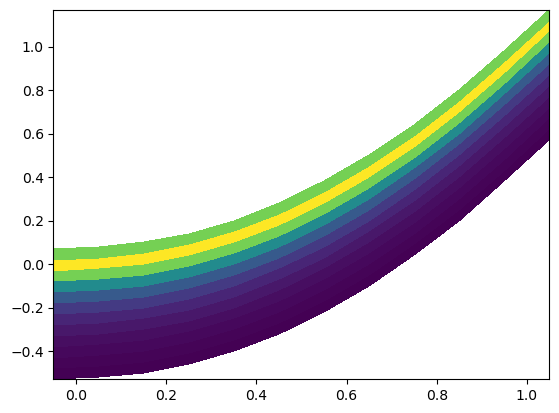

In [9]:
part = df.query('(c in [1]) and (b < 0.6)')
plt.pcolormesh(
    part['a'].values.reshape(11, -1),
    part['b2'].values.reshape(11, -1),
    part['v'].values.reshape(11, -1),
)

What if we want to extract the peak position in a 2d spectrum?
Of course you can do it by iterating over all x values.

In [10]:
df3 = df.query('(c == 1)')

peaks = []
for a in df3['a'].unique():
    part = df3.query(f'a == {a}')
    imax = part['v'].argmax()
    peaks.append(part.iloc[imax,:])
peaks = pd.DataFrame(peaks)
peaks

,a,b,c,b2,v
30,0.0,0.5,1.0,0.00,1.0
93,0.1,0.5,1.0,0.01,1.0
156,0.2,0.5,1.0,0.04,1.0
219,0.3,0.5,1.0,0.09,1.0
282,0.4,0.5,1.0,0.16,1.0
345,0.5,0.5,1.0,0.25,1.0
408,0.6,0.5,1.0,0.36,1.0
471,0.7,0.5,1.0,0.49,1.0
534,0.8,0.5,1.0,0.64,1.0
597,0.9,0.5,1.0,0.81,1.0


Or simply by a single line.

In [11]:
peaks = df3.groupby('a').apply(lambda df: df.iloc[df['v'].argmax(), :])
peaks

,a,b,c,b2,v
a,,,,,
0.0,0.0,0.5,1.0,0.00,1.0
0.1,0.1,0.5,1.0,0.01,1.0
0.2,0.2,0.5,1.0,0.04,1.0
0.3,0.3,0.5,1.0,0.09,1.0
0.4,0.4,0.5,1.0,0.16,1.0
0.5,0.5,0.5,1.0,0.25,1.0
0.6,0.6,0.5,1.0,0.36,1.0
0.7,0.7,0.5,1.0,0.49,1.0
0.8,0.8,0.5,1.0,0.64,1.0


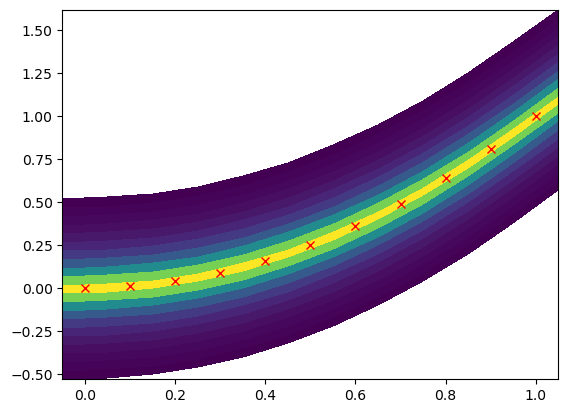

In [12]:
plt.pcolormesh(
    df3['a'].values.reshape(11, -1),
    df3['b2'].values.reshape(11, -1),
    df3['v'].values.reshape(11, -1),
)
plt.plot('a', 'b2', 'x', data=peaks, color='red')